# **UPer | Preprocessing & EDA**

## **Data Cleaning & Preprocessing**

### Import libraries

In [1]:
import pandas as pd
import string
import re
import ast
import numpy as np
import nltk
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_csv('../../dataset/labeled_data/UPer_labelled.csv')

print(df.shape)
print(df.info())
df.head()


(803, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   page            803 non-null    int64  
 1   name            803 non-null    object 
 2   link            803 non-null    object 
 3   thumbnail       803 non-null    object 
 4   rating          803 non-null    float64
 5   date            803 non-null    object 
 6   snippet         249 non-null    object 
 7   images          803 non-null    object 
 8   local_guide     803 non-null    bool   
 9   label_sentimen  249 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 57.4+ KB
None


,page,name,link,thumbnail,rating,date,snippet,images,local_guide,label_sentimen
0,1,Te Ir,https://www.google.com/maps/contrib/1132768062...,https://lh3.googleusercontent.com/a-/ALV-UjUpa...,4.0,sebulan lalu,Universitas yang menjadi bagian Pertamina (per...,['https://lh5.googleusercontent.com/p/AF1QipOA...,True,positif
1,1,RHDN,https://www.google.com/maps/contrib/1155154390...,https://lh3.googleusercontent.com/a-/ALV-UjWqG...,4.0,7 bulan lalu,"Kampus nya cukup besar, lokasi pinggir jalan s...",['https://lh5.googleusercontent.com/p/AF1QipPu...,True,positif
2,1,Mega Safitri,https://www.google.com/maps/contrib/1039782495...,https://lh3.googleusercontent.com/a/ACg8ocJH8h...,3.0,sebulan lalu,Kami pilih kampus ini dg harapan setelah lulus...,[],False,positif
3,1,Muhammad Zidane A,https://www.google.com/maps/contrib/1166708707...,https://lh3.googleusercontent.com/a-/ALV-UjWL4...,5.0,7 bulan lalu,"walaupun terbilang masih baru, tetapi kampus i...",['https://lh5.googleusercontent.com/p/AF1QipPI...,True,positif
4,1,Fahmi Amhar,https://www.google.com/maps/contrib/1122985339...,https://lh3.googleusercontent.com/a-/ALV-UjUOg...,4.0,6 tahun lalu,"Campus ini memiliki sarana yang cukup lengkap,...",['https://lh5.googleusercontent.com/p/AF1QipNr...,True,positif


In [3]:
df['rating'].describe()

count    803.000000
mean       4.602740
std        0.929077
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

### Hapus kolom yang tidak diperlukan

In [4]:
df.columns

Index(['page', 'name', 'link', 'thumbnail', 'rating', 'date', 'snippet',
       'images', 'local_guide', 'label_sentimen'],
      dtype='object')

In [5]:
# drop the columns
df = df.drop(columns=['page', 'name', 'link', 'thumbnail', 'date', 'images', 'local_guide'], axis=1)
df.head(10)

,rating,snippet,label_sentimen
0,4.0,Universitas yang menjadi bagian Pertamina (per...,positif
1,4.0,"Kampus nya cukup besar, lokasi pinggir jalan s...",positif
2,3.0,Kami pilih kampus ini dg harapan setelah lulus...,positif
3,5.0,"walaupun terbilang masih baru, tetapi kampus i...",positif
4,4.0,"Campus ini memiliki sarana yang cukup lengkap,...",positif
5,5.0,Tiket nya 75 ribu utk Olympic Size Pool. Clean...,positif
6,5.0,Dulu terkenalnya dengan nama Pertamina Trainin...,netral
7,5.0,"Kampus yang bagus, fasilitas 90% lengkap, deka...",positif
8,5.0,"baguss universitasnyaa ,salam buat angel anak ...",positif
9,5.0,Area Kampus Sangat Ramah Lingkungan. nuansa as...,positif


### Convert to lowercase

In [6]:
df['snippet'] = df['snippet'].str.lower()
df.head()

,rating,snippet,label_sentimen
0,4.0,universitas yang menjadi bagian pertamina (per...,positif
1,4.0,"kampus nya cukup besar, lokasi pinggir jalan s...",positif
2,3.0,kami pilih kampus ini dg harapan setelah lulus...,positif
3,5.0,"walaupun terbilang masih baru, tetapi kampus i...",positif
4,4.0,"campus ini memiliki sarana yang cukup lengkap,...",positif


### Hapus Missing Values

In [7]:
df.shape

(803, 3)

In [8]:
df.isnull().sum()

rating              0
snippet           554
label_sentimen    554
dtype: int64

In [9]:
df = df.dropna()
df.head()

,rating,snippet,label_sentimen
0,4.0,universitas yang menjadi bagian pertamina (per...,positif
1,4.0,"kampus nya cukup besar, lokasi pinggir jalan s...",positif
2,3.0,kami pilih kampus ini dg harapan setelah lulus...,positif
3,5.0,"walaupun terbilang masih baru, tetapi kampus i...",positif
4,4.0,"campus ini memiliki sarana yang cukup lengkap,...",positif


In [10]:
df.isnull().sum()

rating            0
snippet           0
label_sentimen    0
dtype: int64

In [11]:
df.shape

(249, 3)

### Menghapus Whitespace

In [12]:
def remove_extra_whitespace(text):
    # Menghapus spasi di awal dan akhir teks
    text = text.strip()
    # Menghapus spasi berlebih di tengah teks
    text = re.sub('\s+', ' ', text)
    return text

df['snippet'] = df['snippet'].apply(remove_extra_whitespace)

In [13]:
df.head()

,rating,snippet,label_sentimen
0,4.0,universitas yang menjadi bagian pertamina (per...,positif
1,4.0,"kampus nya cukup besar, lokasi pinggir jalan s...",positif
2,3.0,kami pilih kampus ini dg harapan setelah lulus...,positif
3,5.0,"walaupun terbilang masih baru, tetapi kampus i...",positif
4,4.0,"campus ini memiliki sarana yang cukup lengkap,...",positif


### Hapus Punctuation

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

df['snippet'] = df['snippet'].apply(remove_punctuations)

In [16]:
df.head()

,rating,snippet,label_sentimen
0,4.0,universitas yang menjadi bagian pertamina pers...,positif
1,4.0,kampus nya cukup besar lokasi pinggir jalan si...,positif
2,3.0,kami pilih kampus ini dg harapan setelah lulus...,positif
3,5.0,walaupun terbilang masih baru tetapi kampus in...,positif
4,4.0,campus ini memiliki sarana yang cukup lengkap ...,positif


### Visualisasi sebelum preprocessing

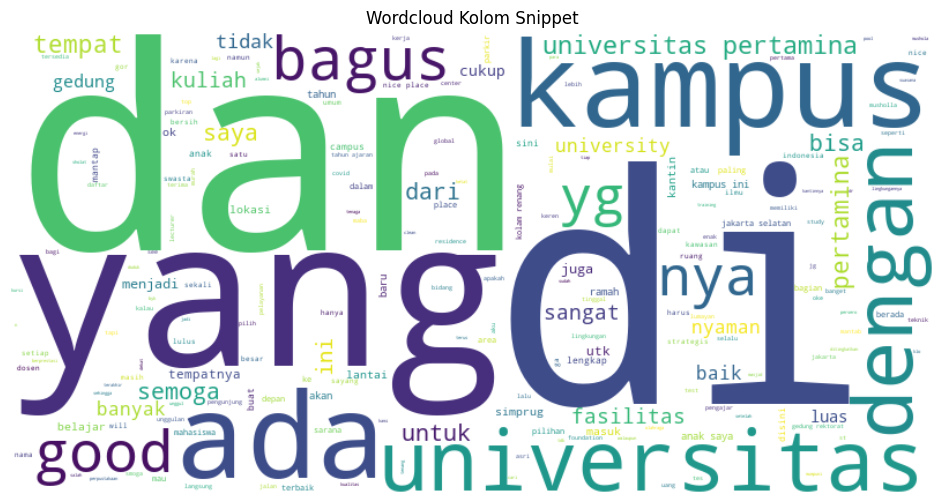

In [17]:
# Gabungkan semua teks dari kolom 'snippet' yang tidak null
text = " ".join(df['snippet'].dropna())

# Buat dan tampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Kolom Snippet')
plt.show()

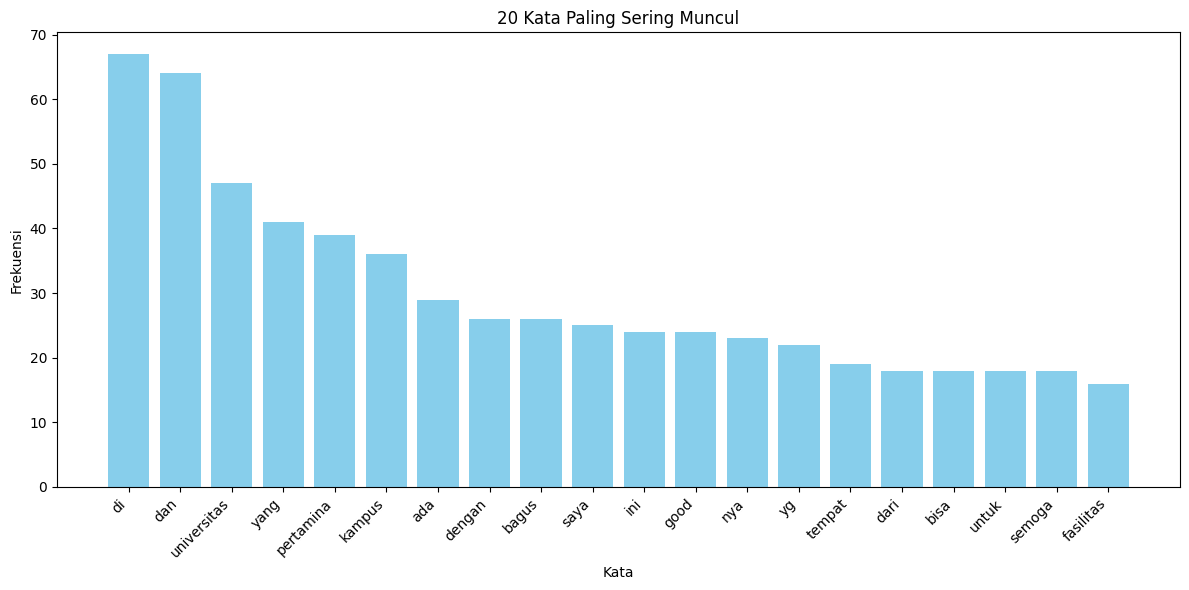

In [18]:
from collections import Counter

# Tokenisasi dan hitung frekuensi kata
words = text.split()
word_freq = Counter(words)

# Ambil 20 kata paling sering muncul
most_common = word_freq.most_common(20)
words_plot, counts_plot = zip(*most_common)

plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('20 Kata Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Hapus special characters / emot

In [19]:
df.head()

,rating,snippet,label_sentimen
0,4.0,universitas yang menjadi bagian pertamina pers...,positif
1,4.0,kampus nya cukup besar lokasi pinggir jalan si...,positif
2,3.0,kami pilih kampus ini dg harapan setelah lulus...,positif
3,5.0,walaupun terbilang masih baru tetapi kampus in...,positif
4,4.0,campus ini memiliki sarana yang cukup lengkap ...,positif


In [20]:
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

df['snippet'] = df['snippet'].apply(remove_spl_chars)

In [21]:
df.head(10)

,rating,snippet,label_sentimen
0,4.0,universitas yang menjadi bagian pertamina pers...,positif
1,4.0,kampus nya cukup besar lokasi pinggir jalan si...,positif
2,3.0,kami pilih kampus ini dg harapan setelah lulus...,positif
3,5.0,walaupun terbilang masih baru tetapi kampus in...,positif
4,4.0,campus ini memiliki sarana yang cukup lengkap ...,positif
5,5.0,tiket nya 75 ribu utk olympic size pool clean ...,positif
6,5.0,dulu terkenalnya dengan nama pertamina trainin...,netral
7,5.0,kampus yang bagus fasilitas 90 lengkap dekat d...,positif
8,5.0,baguss universitasnyaa salam buat angel anak t...,positif
9,5.0,area kampus sangat ramah lingkungan nuansa asr...,positif


### Normalisasi

In [22]:
# Load kamus slang
with open('kamus_slang.json', encoding='utf-8') as f:
    slang_dict = ast.literal_eval(f.read())

# Fungsi untuk mengganti kata slang dengan kata yang sudah dinormalisasi
def normalize_text(text):
    words = text.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    return " ".join(normalized_words)

# Menerapkan normalisasi pada kolom snippet
df['snippet'] = df['snippet'].apply(lambda x: normalize_text(x))
df.head(10)
    

,rating,snippet,label_sentimen
0,4.0,universitas yang menjadi bagian pertamina pers...,positif
1,4.0,kampus nya cukup besar lokasi pinggir jalan si...,positif
2,3.0,kami pilih kampus ini dengan harapan setelah l...,positif
3,5.0,walaupun terbilang masih baru tetapi kampus in...,positif
4,4.0,campus ini memiliki sarana yang cukup lengkap ...,positif
5,5.0,tiket nya 75 ribu untuk olympic size pool clea...,positif
6,5.0,dulu terkenalnya dengan nama pertamina trainin...,netral
7,5.0,kampus yang bagus fasilitas 90 lengkap dekat d...,positif
8,5.0,bagus universitasnyaa salam buat angel anak te...,positif
9,5.0,area kampus sangat ramah lingkungan nuansa asr...,positif


### Tokenisasi

In [23]:
def tokenize_text(text):
    # Tokenisasi teks
    tokens = text.split()
    # Mengembalikan daftar token
    return tokens

df['tokens'] = df['snippet'].apply(tokenize_text)

df.head(10)

,rating,snippet,label_sentimen,tokens
0,4.0,universitas yang menjadi bagian pertamina pers...,positif,"[universitas, yang, menjadi, bagian, pertamina..."
1,4.0,kampus nya cukup besar lokasi pinggir jalan si...,positif,"[kampus, nya, cukup, besar, lokasi, pinggir, j..."
2,3.0,kami pilih kampus ini dengan harapan setelah l...,positif,"[kami, pilih, kampus, ini, dengan, harapan, se..."
3,5.0,walaupun terbilang masih baru tetapi kampus in...,positif,"[walaupun, terbilang, masih, baru, tetapi, kam..."
4,4.0,campus ini memiliki sarana yang cukup lengkap ...,positif,"[campus, ini, memiliki, sarana, yang, cukup, l..."
5,5.0,tiket nya 75 ribu untuk olympic size pool clea...,positif,"[tiket, nya, 75, ribu, untuk, olympic, size, p..."
6,5.0,dulu terkenalnya dengan nama pertamina trainin...,netral,"[dulu, terkenalnya, dengan, nama, pertamina, t..."
7,5.0,kampus yang bagus fasilitas 90 lengkap dekat d...,positif,"[kampus, yang, bagus, fasilitas, 90, lengkap, ..."
8,5.0,bagus universitasnyaa salam buat angel anak te...,positif,"[bagus, universitasnyaa, salam, buat, angel, a..."
9,5.0,area kampus sangat ramah lingkungan nuansa asr...,positif,"[area, kampus, sangat, ramah, lingkungan, nuan..."


### Stopwords Removal

In [24]:
from nltk.corpus import stopwords
# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)
df.head(10)


,rating,snippet,label_sentimen,tokens
0,4.0,universitas yang menjadi bagian pertamina pers...,positif,"[universitas, pertamina, persero, didukung, te..."
1,4.0,kampus nya cukup besar lokasi pinggir jalan si...,positif,"[kampus, nya, lokasi, pinggir, jalan, simprug,..."
2,3.0,kami pilih kampus ini dengan harapan setelah l...,positif,"[pilih, kampus, harapan, lulus, tersalurkan, p..."
3,5.0,walaupun terbilang masih baru tetapi kampus in...,positif,"[terbilang, kampus, akreditasi, unggul, masuk,..."
4,4.0,campus ini memiliki sarana yang cukup lengkap ...,positif,"[campus, memiliki, sarana, lengkap, dikelola, ..."
5,5.0,tiket nya 75 ribu untuk olympic size pool clea...,positif,"[tiket, nya, 75, ribu, olympic, size, pool, cl..."
6,5.0,dulu terkenalnya dengan nama pertamina trainin...,netral,"[terkenalnya, nama, pertamina, training, centr..."
7,5.0,kampus yang bagus fasilitas 90 lengkap dekat d...,positif,"[kampus, bagus, fasilitas, 90, lengkap, jalan,..."
8,5.0,bagus universitasnyaa salam buat angel anak te...,positif,"[bagus, universitasnyaa, salam, angel, anak, t..."
9,5.0,area kampus sangat ramah lingkungan nuansa asr...,positif,"[area, kampus, ramah, lingkungan, nuansa, asri..."


### Stemming dengan Sastrawi


In [26]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['tokens'] = df['tokens'].apply(stem_text)
df.head(10)

,rating,snippet,label_sentimen,tokens
0,4.0,universitas yang menjadi bagian pertamina pers...,positif,"[universitas, pertamina, persero, dukung, tena..."
1,4.0,kampus nya cukup besar lokasi pinggir jalan si...,positif,"[kampus, nya, lokasi, pinggir, jalan, simprug,..."
2,3.0,kami pilih kampus ini dengan harapan setelah l...,positif,"[pilih, kampus, harap, lulus, salur, pertamina..."
3,5.0,walaupun terbilang masih baru tetapi kampus in...,positif,"[bilang, kampus, akreditasi, unggul, masuk, pe..."
4,4.0,campus ini memiliki sarana yang cukup lengkap ...,positif,"[campus, milik, sarana, lengkap, kelola, hasil..."
5,5.0,tiket nya 75 ribu untuk olympic size pool clea...,positif,"[tiket, nya, 75, ribu, olympic, size, pool, cl..."
6,5.0,dulu terkenalnya dengan nama pertamina trainin...,netral,"[kenal, nama, pertamina, training, centre, 201..."
7,5.0,kampus yang bagus fasilitas 90 lengkap dekat d...,positif,"[kampus, bagus, fasilitas, 90, lengkap, jalan,..."
8,5.0,bagus universitasnyaa salam buat angel anak te...,positif,"[bagus, universitasnyaa, salam, angel, anak, t..."
9,5.0,area kampus sangat ramah lingkungan nuansa asr...,positif,"[area, kampus, ramah, lingkung, nuansa, asri, ..."


### Visualisasi setelah preprocessing

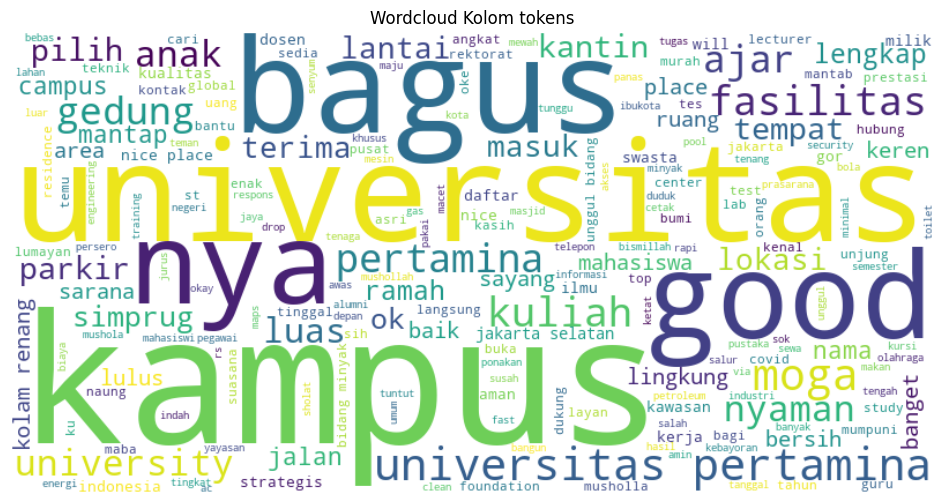

In [27]:
# Gabungkan semua token dari kolom 'tokens' yang tidak null menjadi satu string
all_tokens = [token for tokens in df['tokens'].dropna() for token in tokens]
text = " ".join(all_tokens)

# Buat dan tampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Kolom tokens')
plt.show()

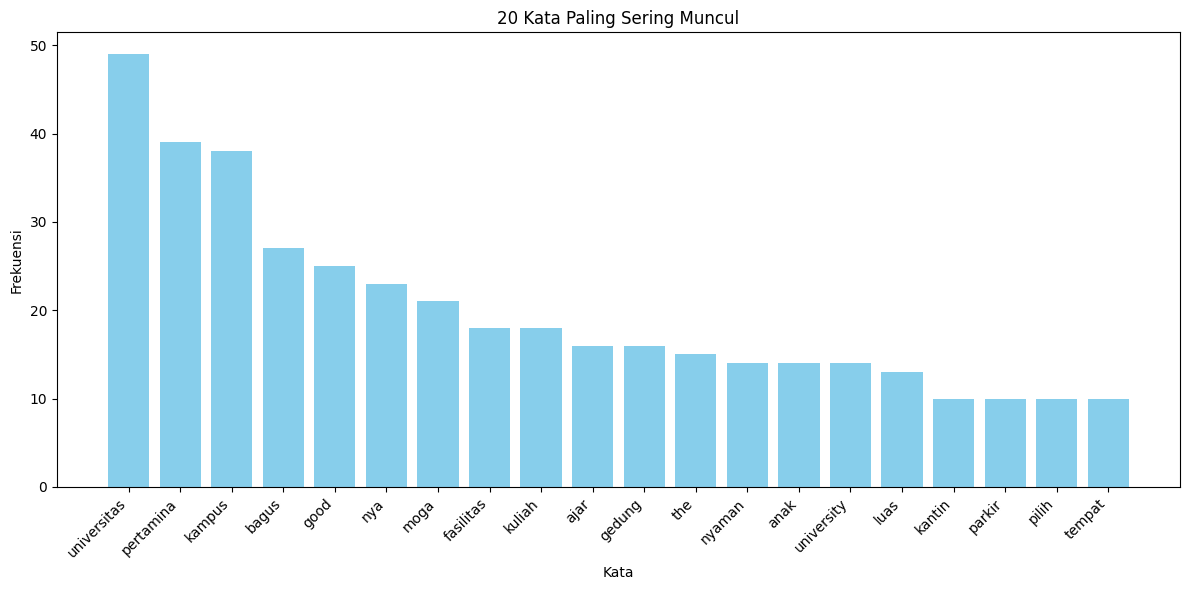

In [28]:
from collections import Counter

# Tokenisasi dan hitung frekuensi kata
words = text.split()
word_freq = Counter(words)

# Ambil 20 kata paling sering muncul
most_common = word_freq.most_common(20)
words_plot, counts_plot = zip(*most_common)

plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('20 Kata Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Simpan dataset bersih


In [29]:
# Ubah urutan kolom sebelum menyimpan
df = df[['rating', 'snippet', 'tokens', 'label_sentimen']]

output_path = '../../dataset/cleaned_dataset/UPer_labelled_cleaned.csv'

try:
	# Save the dataframe to a CSV file
	df.to_csv(output_path, index=False)
	print(f"DataFrame successfully saved to {output_path}")
except Exception as e:
	print(f"An error occurred: {e}")

DataFrame successfully saved to ../../dataset/cleaned_dataset/UPer_labelled_cleaned.csv


## **Exploratory Data Analysis (EDA)**

In [30]:
df['rating'].unique()

array([4., 3., 5., 1., 2.])

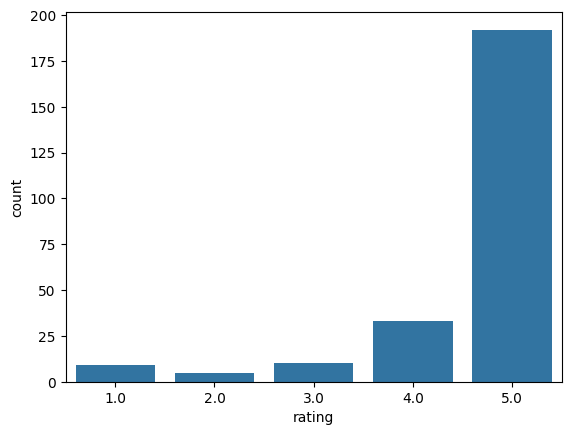

rating
5.0    192
4.0     33
3.0     10
1.0      9
2.0      5
Name: count, dtype: int64


In [31]:
sns.countplot(x=df['rating'])
plt.show()
print(df['rating'].value_counts())

In [32]:
df['label_sentimen'].unique()

array(['positif', 'netral', 'negatif'], dtype=object)

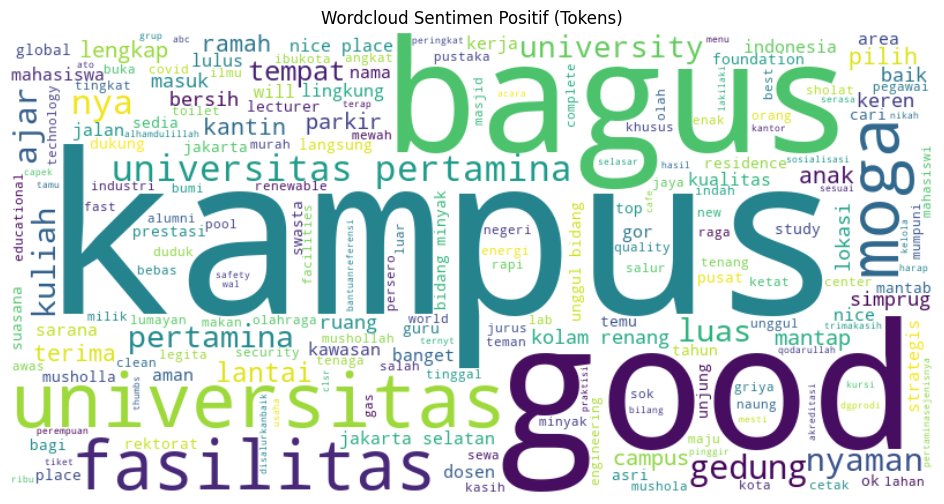

In [33]:
# Visualisasi Wordcloud untuk sentimen positif pada kolom tokens
tokens_positif = df[df['label_sentimen'] == 'positif']['tokens'].dropna()
text_tokens_positif = " ".join([token for tokens in tokens_positif for token in tokens])
wordcloud_tokens_positif = WordCloud(width=800, height=400, background_color='white').generate(text_tokens_positif)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tokens_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif (Tokens)')
plt.show()

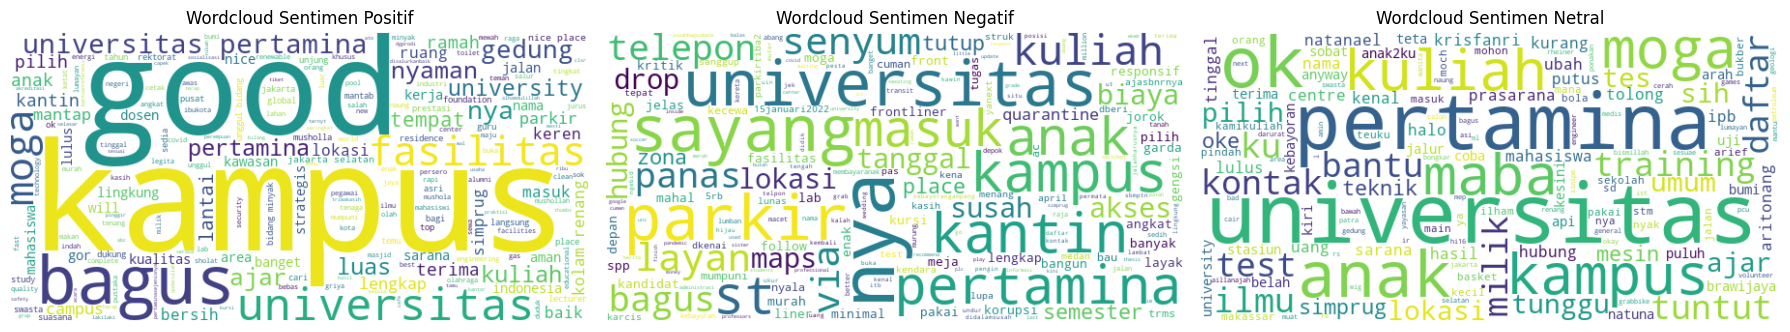

In [34]:
# Visualisasi Wordcloud untuk masing-masing sentimen pada kolom tokens
sentiments = ['positif', 'negatif', 'netral']
plt.figure(figsize=(18, 5))

for i, sentiment in enumerate(sentiments):
    # Gabungkan semua token menjadi satu string untuk sentimen tertentu
    tokens_sentiment = df[df['label_sentimen'] == sentiment]['tokens'].dropna()
    text_sentiment = " ".join([token for tokens in tokens_sentiment for token in tokens])
    wordcloud = WordCloud(width=600, height=300, background_color='white').generate(text_sentiment)
    plt.subplot(1, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud Sentimen {sentiment.capitalize()}')

plt.tight_layout()
plt.show()

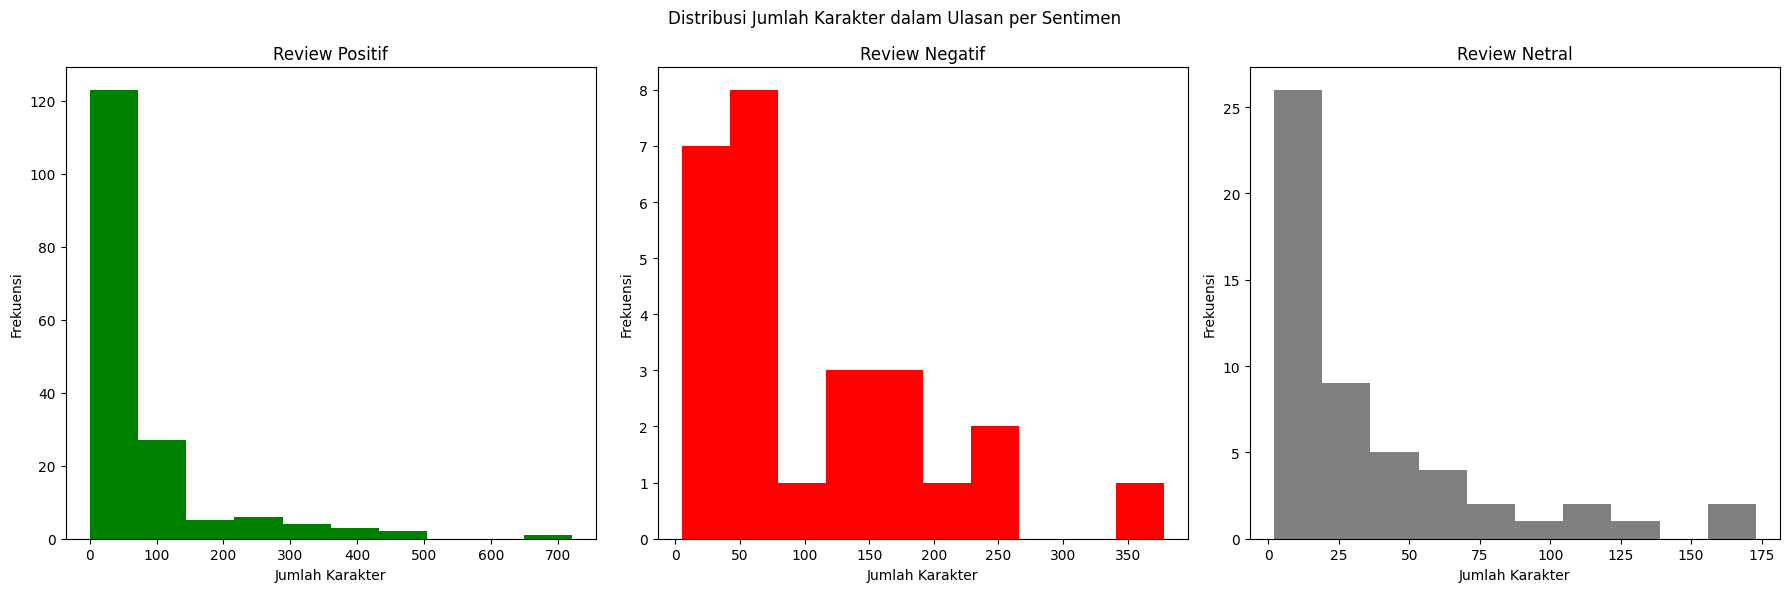

In [35]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ['positif', 'negatif', 'netral']
colors = ['green', 'red', 'gray']

for i, sentiment in enumerate(sentiments):
    review_lengths = df[df['label_sentimen'] == sentiment]['snippet'].str.len()
    axes[i].hist(review_lengths, color=colors[i])
    axes[i].set_title(f'Review {sentiment.capitalize()}')
    axes[i].set_xlabel('Jumlah Karakter')
    axes[i].set_ylabel('Frekuensi')

figure.suptitle('Distribusi Jumlah Karakter dalam Ulasan per Sentimen')
plt.tight_layout()
plt.show()


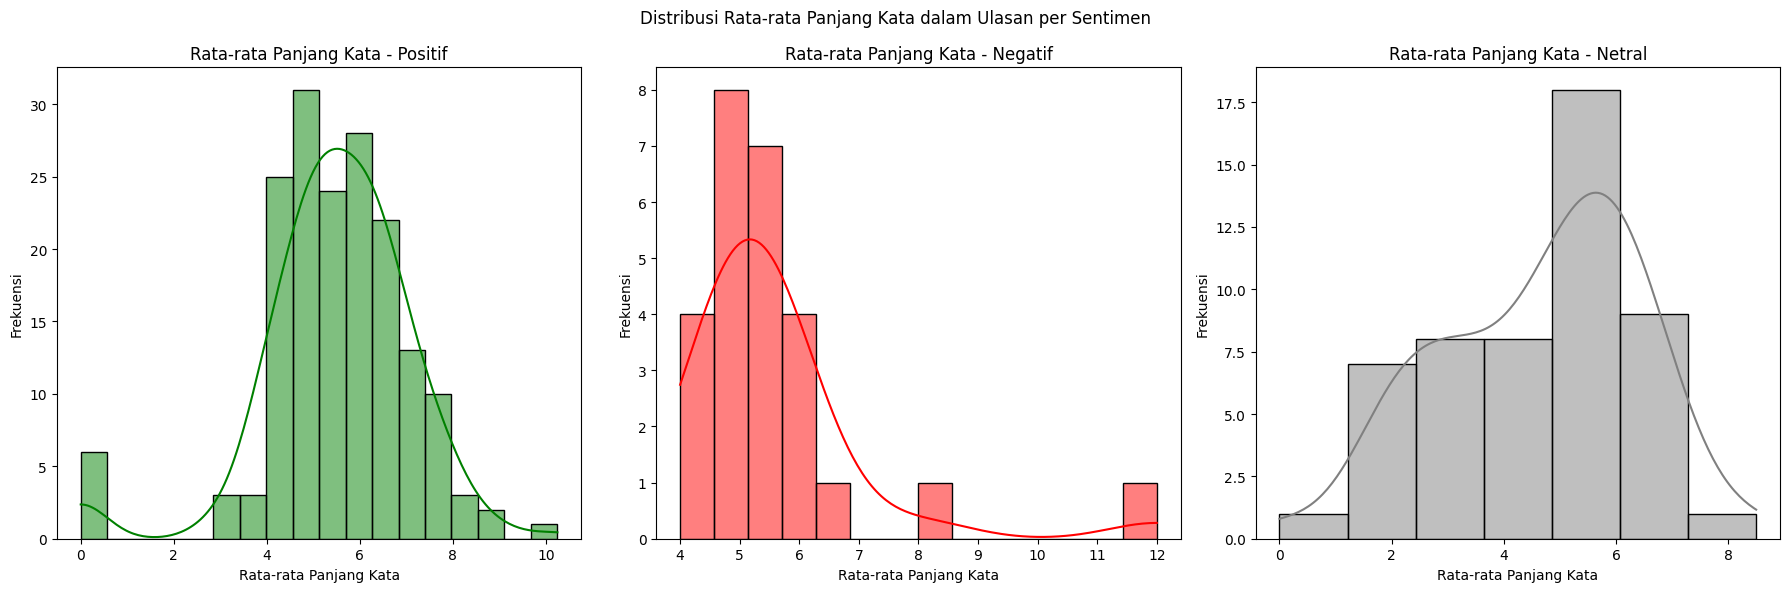

In [36]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ['positif', 'negatif', 'netral']
colors = ['green', 'red', 'gray']

for i, sentiment in enumerate(sentiments):
    # Ambil token untuk setiap sentimen
    tokens = df[df['label_sentimen'] == sentiment]['tokens']
    # Hitung rata-rata panjang kata per ulasan
    avg_word_length = tokens.apply(lambda x: np.mean([len(word) for word in x]) if x else 0)
    sns.histplot(avg_word_length, ax=axes[i], color=colors[i], kde=True)
    axes[i].set_title(f'Rata-rata Panjang Kata - {sentiment.capitalize()}')
    axes[i].set_xlabel('Rata-rata Panjang Kata')
    axes[i].set_ylabel('Frekuensi')

figure.suptitle('Distribusi Rata-rata Panjang Kata dalam Ulasan per Sentimen')
plt.tight_layout()
plt.show()


In [37]:
from collections import Counter
import plotly.express as px

def get_top_token_ngrams(token_series, n=20, ngram=1):
    ngram_list = []
    for tokens in token_series.dropna():
        ngram_list.extend([' '.join(tokens[i:i+ngram]) for i in range(len(tokens)-ngram+1)])
    return Counter(ngram_list).most_common(n)

# Visualisasi untuk sentimen positif
tokens_positif = df[df['label_sentimen'] == 'positif']['tokens']
most_common_uni_positif = get_top_token_ngrams(tokens_positif, 20, 1)
most_common_uni_positif = dict(most_common_uni_positif)

temp_positif = pd.DataFrame({
    "Common_words": list(most_common_uni_positif.keys()),
    "Count": list(most_common_uni_positif.values())
})

fig_positif = px.bar(
    temp_positif, x="Count", y="Common_words",
    title="Common Words in Positif Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_positif.show()

# Visualisasi untuk sentimen negatif
tokens_negatif = df[df['label_sentimen'] == 'negatif']['tokens']
most_common_uni_negatif = get_top_token_ngrams(tokens_negatif, 20, 1)
most_common_uni_negatif = dict(most_common_uni_negatif)

temp_negatif = pd.DataFrame({
    "Common_words": list(most_common_uni_negatif.keys()),
    "Count": list(most_common_uni_negatif.values())
})

fig_negatif = px.bar(
    temp_negatif, x="Count", y="Common_words",
    title="Common Words in Negatif Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_negatif.show()

# Visualisasi untuk sentimen netral
tokens_netral = df[df['label_sentimen'] == 'netral']['tokens']
most_common_uni_netral = get_top_token_ngrams(tokens_netral, 20, 1)
most_common_uni_netral = dict(most_common_uni_netral)

temp_netral = pd.DataFrame({
    "Common_words": list(most_common_uni_netral.keys()),
    "Count": list(most_common_uni_netral.values())
})

fig_netral = px.bar(
    temp_netral, x="Count", y="Common_words",
    title="Common Words in Netral Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_netral.show()


# **⚠️ Warning:**  
Disitribusi kelas tidak seimbang (imbalance data) pada kelas positif, negatif, dan netral sehingga perlu dilakukan balancing data. (bisa pake teknik oversampling, undersampling, atau SMOTE)

In [38]:
df['label_sentimen'].value_counts()

label_sentimen
positif    171
netral      52
negatif     26
Name: count, dtype: int64